-----
##### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

In [136]:
import numpy as np
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
tf.__version__

'2.5.2'

In [137]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
tf.version.VERSION

'2.5.2'

In [138]:
cTem = np.array([-40 , -10, 0, 8, 15, 22, 38], dtype = float)
fTem = np.array([-40 , 14, 32, 46.4, 59, 71.6, 100.4], dtype = float)

for i, c in enumerate(cTem):
    print("{} degree Celsius = {} degree Fahrenhet".format(c, fTem[i]))

-40.0 degree Celsius = -40.0 degree Fahrenhet
-10.0 degree Celsius = 14.0 degree Fahrenhet
0.0 degree Celsius = 32.0 degree Fahrenhet
8.0 degree Celsius = 46.4 degree Fahrenhet
15.0 degree Celsius = 59.0 degree Fahrenhet
22.0 degree Celsius = 71.6 degree Fahrenhet
38.0 degree Celsius = 100.4 degree Fahrenhet


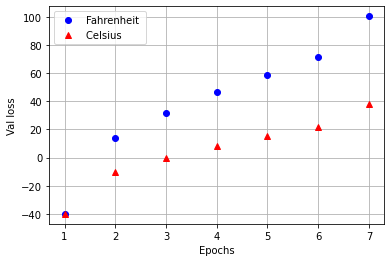

In [139]:
import matplotlib.pyplot as plt

x = range(1, len(cTem) + 1)
plt.plot(x, fTem, 'bo', label='Fahrenheit ')
plt.plot(x, cTem, 'r^', label='Celsius ')
plt.xlabel('Epochs')
plt.ylabel('Val loss')
plt.legend()
plt.grid()
plt.show()


In [140]:
# (0°C × 9/5) + 32 = 32
celsius = 38
fahrenheit = (celsius * 9 /5 ) + 32

print('fahrenheit:', fahrenheit)


fahrenheit: 100.4


In [141]:
# (0°C × 9/5) + 32 = 32
def celsius2fahrenheit(celsius=32):
    return (celsius * 9 /5 ) + 32

# (32°F − 32) × 5/9 
def fahrenheit2celsius(fahrenheit=32):
    return (fahrenheit - 32) * 5 / 9 

print('fahrenheit:', celsius2fahrenheit(38))
print('fahrenheit:', fahrenheit2celsius(100.4))

fahrenheit: 100.4
fahrenheit: 38.0


In [142]:
l0 = keras.layers.Dense(units=1, input_shape=[1])
model = keras.Sequential([l0])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1, input_shape=[1])
# ])

In [143]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [144]:
history = model.fit(
    cTem, fTem, 
    epochs=50, 
    verbose=False
    )
print('done')

done


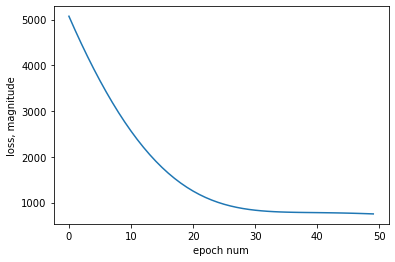

In [145]:
import matplotlib.pyplot as plt
plt.xlabel('epoch num')
plt.ylabel('loss, magnitude')
plt.plot(history.history['loss'])

In [146]:
print(model.predict([-10, 10, 100.0]))

[[-17.814016]
 [ 27.012934]
 [228.7342  ]]


In [147]:
print("these are the layer variable: {}".format(l0.get_weights()) )

these are the layer variable: [array([[2.2413476]], dtype=float32), array([4.599458], dtype=float32)]


In [148]:
predY = model.predict(cTem)

for i in range(len(predY)):
    print ('True: ', fTem[i], ', prediction: ', predY[i][0], ', difference: ', predY[i][0] - fTem[i] )

True:  -40.0 , prediction:  -85.05444 , difference:  -45.054443359375
True:  14.0 , prediction:  -17.814016 , difference:  -31.814016342163086
True:  32.0 , prediction:  4.599458 , difference:  -27.40054178237915
True:  46.4 , prediction:  22.53024 , difference:  -23.86976089477539
True:  59.0 , prediction:  38.21967 , difference:  -20.780330657958984
True:  71.6 , prediction:  53.909103 , difference:  -17.690896606445307
True:  100.4 , prediction:  89.77066 , difference:  -10.62933959960938


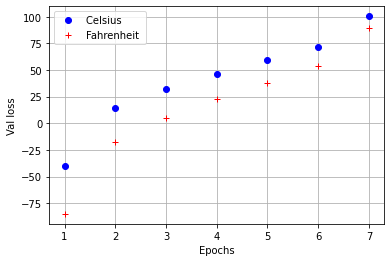

In [149]:
x = range(1, len(predY) + 1)
plt.plot(x, fTem, 'bo', label='Celsius ')
plt.plot(x, predY, 'r+', label='Fahrenheit ')
plt.xlabel('Epochs')
plt.ylabel('Val loss')
plt.legend()
plt.grid()
plt.show()

In [150]:
predY = model.predict(cTem)

sum = 0
for i in range(len(predY)):
    sum += (predY[i][0] - fTem[i]) * (predY[i][0] - fTem[i])
    print ('True: ', fTem[i], ', prediction: ', predY[i][0], ', difference: ', predY[i][0] - fTem[i] )

print( sum / len(predY))

True:  -40.0 , prediction:  -85.05444 , difference:  -45.054443359375
True:  14.0 , prediction:  -17.814016 , difference:  -31.814016342163086
True:  32.0 , prediction:  4.599458 , difference:  -27.40054178237915
True:  46.4 , prediction:  22.53024 , difference:  -23.86976089477539
True:  59.0 , prediction:  38.21967 , difference:  -20.780330657958984
True:  71.6 , prediction:  53.909103 , difference:  -17.690896606445307
True:  100.4 , prediction:  89.77066 , difference:  -10.62933959960938
745.7660718145822


In [151]:
from sklearn import metrics
result = metrics.mean_squared_error(fTem, predY)
result

745.7660718145822

In [152]:
## more 

In [153]:

modelSecond = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=1),
])
modelSecond.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
modelSecond.fit(cTem, fTem, epochs=100, verbose=False)

In [154]:
print(modelSecond.predict([38.0]))
print(model.predict([38.0]))

[[100.347115]]
[[89.77066]]


In [155]:
print('weight l0' , l0.get_weights() )
print('weight l1' , l1.get_weights() )
print('weight l2' , l2.get_weights() )

weight l0 [array([[2.2413476]], dtype=float32), array([4.599458], dtype=float32)]
weight l1 [array([[-0.6526019 , -0.29504278,  0.18355547, -0.67677015],
       [ 0.16668808,  0.6201212 , -0.8475037 ,  1.3062905 ],
       [-0.3331575 ,  0.6011031 ,  0.3956751 ,  0.2742094 ],
       [ 0.6549148 ,  1.3474215 , -0.18603535,  0.6620404 ]],
      dtype=float32), array([ 0.20331497, -3.9182138 , -1.7482332 , -3.9604974 ], dtype=float32)]
weight l2 [array([[ 0.00134371],
       [-1.2499856 ],
       [-0.07936848],
       [-1.0392642 ]], dtype=float32), array([3.5277538], dtype=float32)]


In [157]:
predY = modelSecond.predict(cTem)
result = metrics.mean_squared_error(fTem, predY)
result

0.03133274602928803